In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math 
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('D:\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_5\\Week 5 Mini Project\\Datasets\Train.csv')
df

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60
...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17


In [3]:
df.dtypes

row_id         int64
time          object
x              int64
y              int64
direction     object
congestion     int64
dtype: object

In [4]:
df.shape

(848835, 6)

In [5]:
df['time'] = pd.to_datetime(df['time'])
df.dtypes

row_id                 int64
time          datetime64[ns]
x                      int64
y                      int64
direction             object
congestion             int64
dtype: object

In [6]:
df['hour'] = df['time'].dt.hour
df['date'] = df['time'].dt.date
df.head()

,row_id,time,x,y,direction,congestion,hour,date
0,0,1991-04-01,0,0,EB,70,0,1991-04-01
1,1,1991-04-01,0,0,NB,49,0,1991-04-01
2,2,1991-04-01,0,0,SB,24,0,1991-04-01
3,3,1991-04-01,0,1,EB,18,0,1991-04-01
4,4,1991-04-01,0,1,NB,60,0,1991-04-01


In [7]:
df.tail()

,row_id,time,x,y,direction,congestion,hour,date
848830,848830,1991-09-30 11:40:00,2,3,NB,54,11,1991-09-30
848831,848831,1991-09-30 11:40:00,2,3,NE,28,11,1991-09-30
848832,848832,1991-09-30 11:40:00,2,3,SB,68,11,1991-09-30
848833,848833,1991-09-30 11:40:00,2,3,SW,17,11,1991-09-30
848834,848834,1991-09-30 11:40:00,2,3,WB,24,11,1991-09-30


In [8]:
df['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [9]:
df.drop(['row_id', 'time'], inplace=True, axis=1)
df.head()

,x,y,direction,congestion,hour,date
0,0,0,EB,70,0,1991-04-01
1,0,0,NB,49,0,1991-04-01
2,0,0,SB,24,0,1991-04-01
3,0,1,EB,18,0,1991-04-01
4,0,1,NB,60,0,1991-04-01


In [10]:
group_dic = df.groupby(['direction']).agg({'congestion': 'mean'})
group_dic

,congestion
direction,
EB,49.571171
NB,51.853913
NE,39.971251
NW,27.188912
SB,53.716332
SE,34.859637
SW,42.019538
WB,49.842289


In [11]:
spec_df = df[df['direction'] == 'SB']
spec_df

,x,y,direction,congestion,hour,date
2,0,0,SB,24,0,1991-04-01
5,0,1,SB,58,0,1991-04-01
9,0,2,SB,46,0,1991-04-01
14,0,3,SB,49,0,1991-04-01
20,1,0,SB,44,0,1991-04-01
...,...,...,...,...,...,...
848806,1,3,SB,66,11,1991-09-30
848811,2,0,SB,45,11,1991-09-30
848817,2,1,SB,37,11,1991-09-30
848825,2,2,SB,64,11,1991-09-30


In [12]:
df = spec_df

In [13]:
df['direction'].unique()

array(['SB'], dtype=object)

In [14]:
def count_Veh(df):
    # Initialize columns to store the sum for each period
    df['EM'] = 0
    df['M'] = 0
    df['AN'] = 0
    df['E'] = 0
    
    # Apply conditions to assign sums based on the hour
    df.loc[(df['hour'] >= 0) & (df['hour'] < 6), 'EM'] = df['congestion']
    df.loc[(df['hour'] >= 6) & (df['hour'] < 12), 'M'] = df['congestion']
    df.loc[(df['hour'] >= 12) & (df['hour'] < 18), 'AN'] = df['congestion']
    df.loc[(df['hour'] >= 18) & (df['hour'] < 24), 'E'] = df['congestion']

In [15]:
count_Veh(df)
df

C:\Users\abo_O\AppData\Local\Temp\ipykernel_24124\3846221518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EM'] = 0
C:\Users\abo_O\AppData\Local\Temp\ipykernel_24124\3846221518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['M'] = 0
C:\Users\abo_O\AppData\Local\Temp\ipykernel_24124\3846221518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,x,y,direction,congestion,hour,date,EM,M,AN,E
2,0,0,SB,24,0,1991-04-01,24,0,0,0
5,0,1,SB,58,0,1991-04-01,58,0,0,0
9,0,2,SB,46,0,1991-04-01,46,0,0,0
14,0,3,SB,49,0,1991-04-01,49,0,0,0
20,1,0,SB,44,0,1991-04-01,44,0,0,0
...,...,...,...,...,...,...,...,...,...,...
848806,1,3,SB,66,11,1991-09-30,0,66,0,0
848811,2,0,SB,45,11,1991-09-30,0,45,0,0
848817,2,1,SB,37,11,1991-09-30,0,37,0,0
848825,2,2,SB,64,11,1991-09-30,0,64,0,0


In [16]:
df.drop(['hour', 'direction'], axis=1, inplace=True)
df

C:\Users\abo_O\AppData\Local\Temp\ipykernel_24124\907399048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['hour', 'direction'], axis=1, inplace=True)


,x,y,congestion,date,EM,M,AN,E
2,0,0,24,1991-04-01,24,0,0,0
5,0,1,58,1991-04-01,58,0,0,0
9,0,2,46,1991-04-01,46,0,0,0
14,0,3,49,1991-04-01,49,0,0,0
20,1,0,44,1991-04-01,44,0,0,0
...,...,...,...,...,...,...,...,...
848806,1,3,66,1991-09-30,0,66,0,0
848811,2,0,45,1991-09-30,0,45,0,0
848817,2,1,37,1991-09-30,0,37,0,0
848825,2,2,64,1991-09-30,0,64,0,0


In [17]:
df.drop(['x', 'y'], axis=1, inplace=True)
df

C:\Users\abo_O\AppData\Local\Temp\ipykernel_24124\2963651451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['x', 'y'], axis=1, inplace=True)


,congestion,date,EM,M,AN,E
2,24,1991-04-01,24,0,0,0
5,58,1991-04-01,58,0,0,0
9,46,1991-04-01,46,0,0,0
14,49,1991-04-01,49,0,0,0
20,44,1991-04-01,44,0,0,0
...,...,...,...,...,...,...
848806,66,1991-09-30,0,66,0,0
848811,45,1991-09-30,0,45,0,0
848817,37,1991-09-30,0,37,0,0
848825,64,1991-09-30,0,64,0,0


In [18]:
df = df.groupby('date').sum().reset_index()

# Display the result
df

,date,congestion,EM,M,AN,E
0,1991-04-01,45243,9947,11508,12280,11508
1,1991-04-02,45768,10549,11447,12504,11268
2,1991-04-03,45720,9820,11595,12355,11950
3,1991-04-04,49194,10989,12396,13440,12369
4,1991-04-05,46455,10339,12148,12429,11539
...,...,...,...,...,...,...
178,1991-09-26,46326,9927,12292,12583,11524
179,1991-09-27,49508,10125,12015,14131,13237
180,1991-09-28,47256,10924,11674,12658,12000
181,1991-09-29,45228,11108,11208,11529,11383


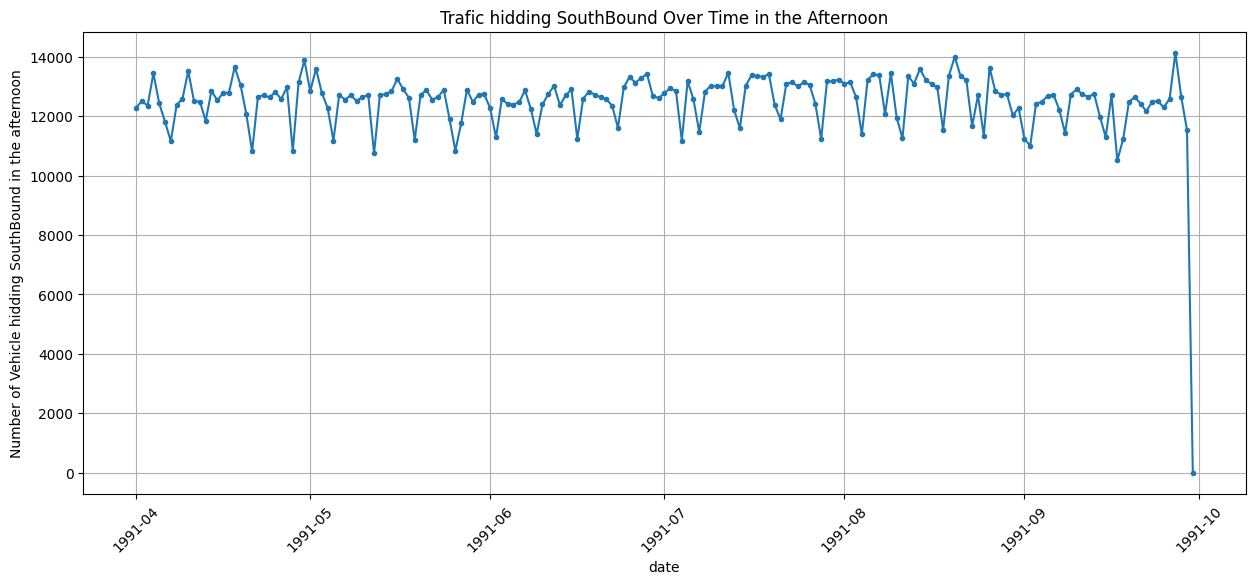

In [19]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(15,6))
plt.plot(df['date'], df['AN'], marker='.')
plt.title(f'Trafic hidding SouthBound Over Time in the Afternoon')
plt.xlabel('date')
plt.ylabel(f'Number of Vehicle hidding SouthBound in the afternoon')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

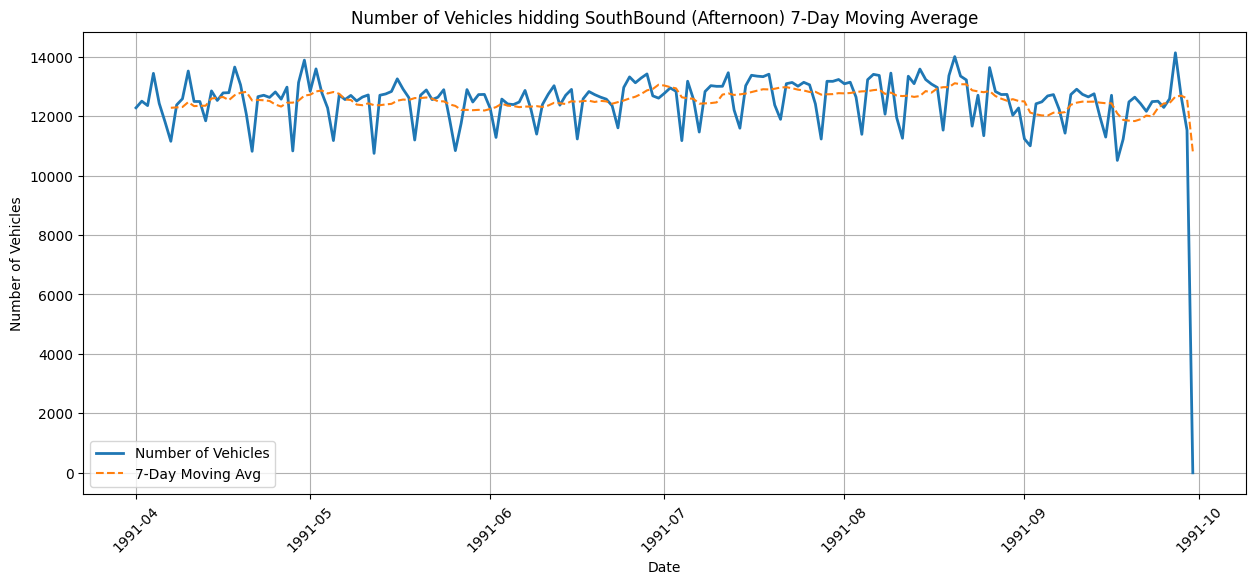

In [20]:
window = 7
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['AN'], label='Number of Vehicles', linewidth=2)
plt.plot(df['date'], df['AN'].rolling(window=window).mean(), label=f'{window}-Day Moving Avg', linestyle='--')
plt.title(f'Number of Vehicles hidding SouthBound (Afternoon) {window}-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

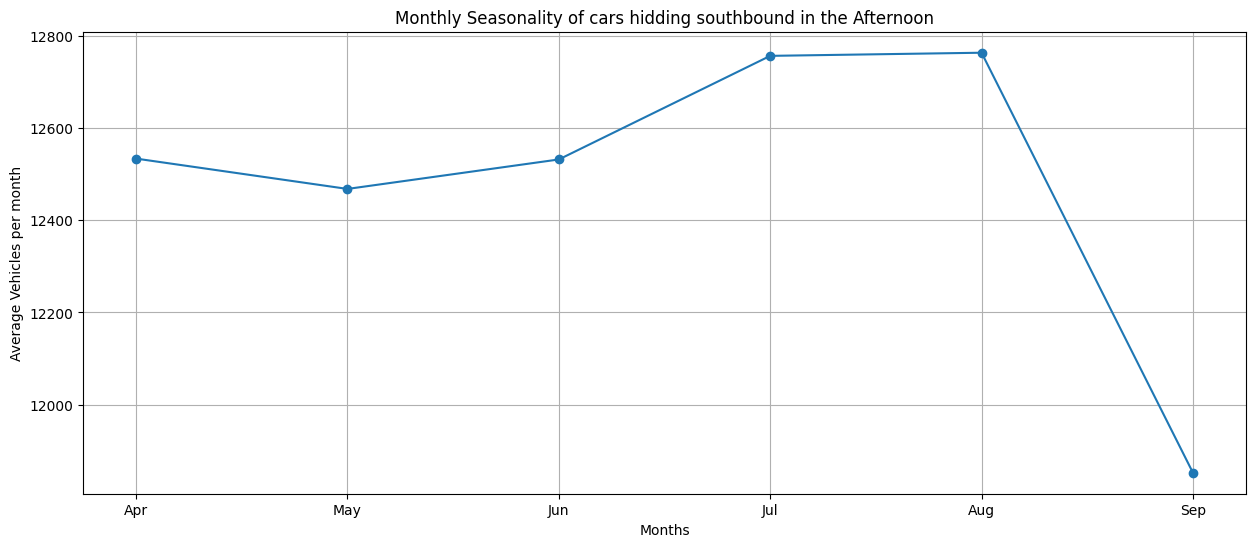

In [21]:
df['Month'] = df['date'].dt.month

monthly_average = df.groupby('Month')['AN'].mean()

plt.figure(figsize=(15, 6))
plt.plot(monthly_average.index, monthly_average.values, marker='o')
plt.title(f'Monthly Seasonality of cars hidding southbound in the Afternoon')
plt.xlabel('Months')
plt.ylabel('Average Vehicles per month')
plt.xticks(range(4, 10), ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])
plt.grid(True)
plt.show()

In [22]:
df['Month'].unique()

array([4, 5, 6, 7, 8, 9])

In [23]:
df.head()

,date,congestion,EM,M,AN,E,Month
0,1991-04-01,45243,9947,11508,12280,11508,4
1,1991-04-02,45768,10549,11447,12504,11268,4
2,1991-04-03,45720,9820,11595,12355,11950,4
3,1991-04-04,49194,10989,12396,13440,12369,4
4,1991-04-05,46455,10339,12148,12429,11539,4


In [24]:
df.set_index('date', inplace=True)
df

,congestion,EM,M,AN,E,Month
date,,,,,,
1991-04-01,45243,9947,11508,12280,11508,4
1991-04-02,45768,10549,11447,12504,11268,4
1991-04-03,45720,9820,11595,12355,11950,4
1991-04-04,49194,10989,12396,13440,12369,4
1991-04-05,46455,10339,12148,12429,11539,4
...,...,...,...,...,...,...
1991-09-26,46326,9927,12292,12583,11524,9
1991-09-27,49508,10125,12015,14131,13237,9
1991-09-28,47256,10924,11674,12658,12000,9


In [25]:
train_size = int(len(df) * 0.8)
train_size

146

In [26]:
train = df[:train_size].iloc[:,1:2].values
test = df[train_size:].iloc[:,1:2].values

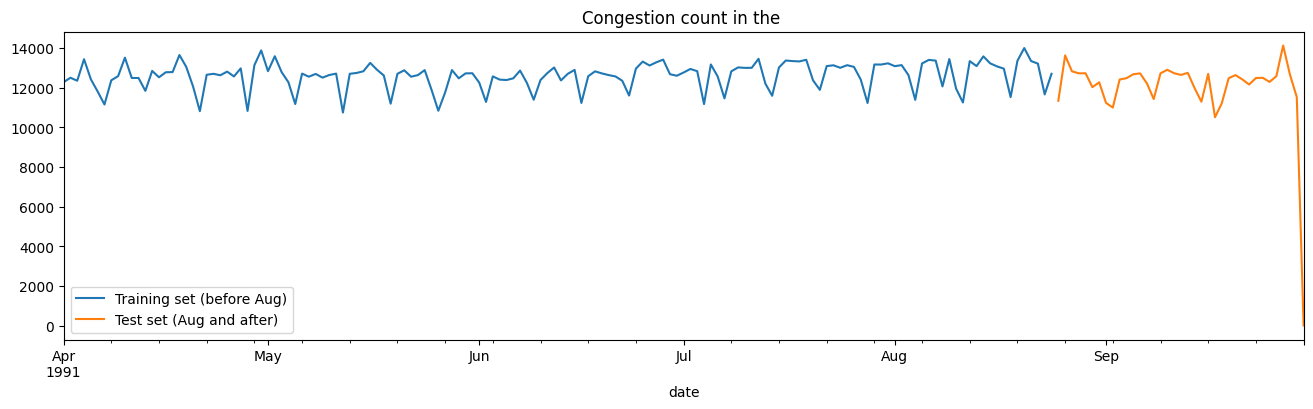

In [27]:
df['AN'][:train_size].plot(figsize=(16,4), legend=True)
df['AN'][train_size:].plot(figsize=(16,4), legend=True)
plt.legend(['Training set (before Aug)', 'Test set (Aug and after)'])
plt.title('Congestion count in the ')
plt.show()

In [28]:
def plot_pred(test, pred):
    plt.plot(test, color='red', label='Real car count')
    plt.plot(pred, color='blue', label='Predicted car count')
    plt.title('car Prediction count')
    plt.xlabel('Time')
    plt.ylabel('car prediction')
    plt.legend()
    plt.show()

def return_rmse(test,pred):
    rmse = math.sqrt(mean_squared_error(test, pred))
    print("The root mean squared error is {}.".format(rmse))

In [29]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)

In [30]:
train_scaled

array([[0.72326308],
       [0.84074941],
       [0.69847775],
       [0.92661983],
       [0.79976581],
       [0.76424668],
       [0.70374707],
       [0.7412178 ],
       [0.88017174],
       [0.74297424],
       [0.79449649],
       [0.92740047],
       [0.87704918],
       [0.70257611],
       [0.89090554],
       [0.7587822 ],
       [0.81850117],
       [0.81186573],
       [0.93403591],
       [0.90710383],
       [0.7470726 ],
       [0.79137393],
       [0.80171741],
       [0.        ],
       [0.82884465],
       [0.93052303],
       [0.85421546],
       [0.8950039 ],
       [0.90866511],
       [0.77029664],
       [1.        ],
       [0.82552693],
       [0.80874317],
       [0.81576893],
       [0.77068696],
       [0.73614364],
       [0.91647151],
       [0.80269321],
       [0.92564403],
       [0.79586261],
       [0.7685402 ],
       [0.86241218],
       [0.75722092],
       [0.81010929],
       [0.74570648],
       [0.7578064 ],
       [0.87295082],
       [0.868

In [31]:
len(train_scaled)

146

In [32]:
X_train = []
y_train = []
for i in range(6,140):
    X_train.append(train_scaled[i-6:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [33]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [34]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1],1)),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1),
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 6, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 6, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 6, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 312,251 (1.19 MB)

 Trainable params: 312,251 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - loss: 0.4470
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0364
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0128
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0221
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0234
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0188
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0096
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0114
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0152
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0199
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0115
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147
Epoch 15/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - l

In [36]:
dataset_total = pd.concat((df["AN"][:train_size], df["AN"][train_size:]), axis=0)
inputs = dataset_total[len(dataset_total)-len(test)-6:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [37]:
X_test = []
for i in range(6,43):
    X_test.append(inputs[i-6:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


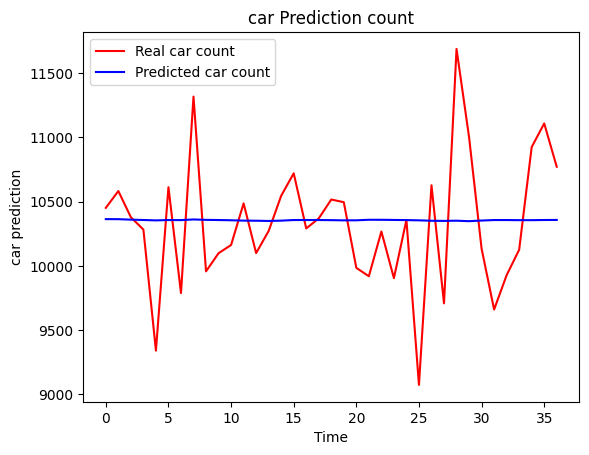

In [38]:
plot_pred(test, pred_price)

In [39]:
return_rmse(test, pred_price)

The root mean squared error is 511.48596891049397.
